In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import scipy.misc

In [236]:
def showImage(img):
    plt.imshow(img)
    plt.show()

In [239]:
def showGrayImage(gray):
    plt.imshow(gray, cmap = plt.get_cmap('gray'))
    plt.show()

In [227]:
def getImage():
    return scipy.misc.face();

In [229]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

(768, 1024)


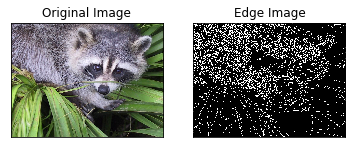

In [237]:

img = getImage();
edges = cv2.Canny(img,100,200)
print(edges.shape)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()


In [234]:
img.shape
img.dtype
gray=rgb2gray(img)
# plt.imshow(gray, cmap = plt.get_cmap('gray'))
# plt.show()
print(gray.shape)
print(img.shape)

(768, 1024)
(768, 1024, 3)


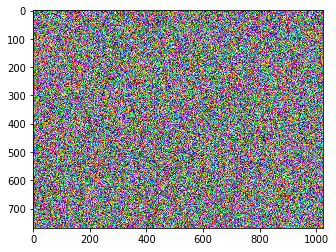

In [53]:
img2=np.random.rand(*img.shape)
showImage(img2)

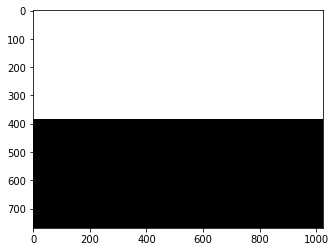

In [176]:
temp = np.zeros(img2.shape, dtype='uint8')
ht = temp.shape[0]
ht_new = int(ht/2)
wd = temp.shape[1]

temp[:,:,2] = np.full(temp[:,:,1].shape,0)
temp[0:ht_new,:,2] = np.full((ht_new, wd),255)

temp[:,:,1] = np.full(temp[:,:,1].shape,0)
temp[0:ht_new,:,1] = np.full((ht_new, wd),255)

temp[:,:,0] = np.full(temp[:,:,1].shape,0)
temp[0:ht_new,:,0] = np.full((ht_new, wd),255)

showImage(temp)

In [221]:
filter = np.zeros([3,3], dtype=np.uint8)
filter[0,:] = np.repeat(225, 3)
filter[1,:] = np.repeat(0, 3)
filter[2,:] = np.repeat(225, 3)

filter = 

print(filter)
print(filter.dtype)

[[225 225 225]
 [  0   0   0]
 [225 225 225]]
uint8


In [211]:
def conv(chnl, filter):
    wd = chnl.shape[1]-filter.shape[1]+1
    ht = chnl.shape[0]-filter.shape[0]+1
    final = np.zeros([ht,wd], filter.dtype)
    filter_w = filter.shape[1]
    filter_h = filter.shape[0]
    
    for w in range(0, wd):
        for h in range(0, ht):
            chnl[h : h+filter_h, w : w+filter_w]
            mult = np.multiply(chnl[h : h+filter_h, w : w+filter_w], filter)
            final[h,w] = np.sum(mult)
            
    return final


765.0
765.0
765.0
(array([382, 382, 382, ..., 383, 383, 383]), array([   0,    0,    0, ..., 1021, 1021, 1021]), array([0, 1, 2, ..., 0, 1, 2]))


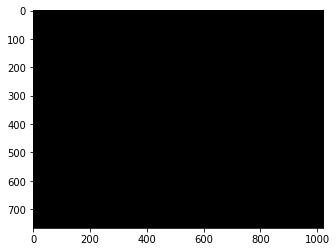

In [186]:
filterImg = conv(temp[:,:,0], filter)
finalImg = np.zeros((*(filterImg.shape), 3))
finalImg[:,:,0] = filterImg
print(np.amax(finalImg))

finalImg[:,:,1] = conv(temp[:,:,1], filter)
print(np.amax(finalImg))

finalImg[:,:,2] = conv(temp[:,:,2], filter)
print(np.amax(finalImg))

print(np.where(finalImg==765.))
showImage(finalImg)

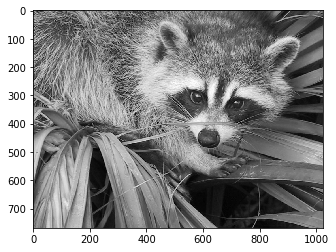

In [241]:
grayImg = rgb2gray(img)
filterImg = conv(grayImg, filter)

# print(filter.dtype)
# print(img.dtype)
# print(filterImg.dtype)
showGrayImage(grayImg)